<a href="https://colab.research.google.com/github/achluky/EL-7007-DeepFace/blob/main/DeepFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Pengenalan Wajah Anggota Kelas dengan DeepFace**
### **<center>Ahmad Luky Ramdani - 33221020**
### **<center>Varuliantor Dear - 33218010**


---




# Pengenalan Wajah

Melakukan prediksi kemiripian gambar dengan menggunakan library deepface [link](https://github.com/serengil/deepface). Sistem mampu mendeteksi wajah dengan katagori `anggota kelas` dan `bukan anggota kelas`. Sehingga dalam eksperimen ini terdapat dua dataset yaitu dataset individu dalam anggota kelas dan dataset bukan anggota kelas.

Pada eksperimen ini dilakukan beberapa tahapan yaitu:

1. Menginstall Packgae yang dibutuhkan
2. Membuat dataset
3. Melakukan analisis data eksperimen dengan menggunakan data test
4. Implementasi model terbaik

Pada implementasi sistem mampu mengidetifikasi wajah dengan alur sebagai berikut:

1. Jika sistem berhasil mengenali wajah: `<Foto+Label dari Test Data> <Foto+Label dari Database pas foto> Benar/Salah`

2. Jika sistem tidak berhasil mengenali wajah: `<Foto+Label Test Data> Unknown Benar/Salah `

# Menginstall Package

Package python yang diperlukan dalam melakukan eksperimen ini adalah
1. deepface 
2. matplotlib
3. pandas
4. numpy

Berikut code untuk proses installasi package

In [ ]:
%pip install deepface matplotlib numpy pandas

     |████████████████████████████████| 65 kB 3.8 MB/s 
     |████████████████████████████████| 60.5 MB 1.2 MB/s 
     |████████████████████████████████| 87 kB 8.1 MB/s 
     |████████████████████████████████| 2.3 MB 39.9 MB/s 
     |████████████████████████████████| 462 kB 11.4 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=2a5f7836f0607febe4810fc4688a941301ad259d83bba7efa973a7007c4750b7
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have im

# Mengambil dataset dari Github

Dataset terdiri dari dua bagian yang disimpan dalam Github yaitu 
1. Dataset Training (basisdata wajah)
2. Dataset Testing

Pada dataset training terdapat 2 directory yang menyatakan informasi kategori data yaitu kategori **"anggota kelas"** dan **"bukan anggota kelas (unknow)"**. Kategori tersebut merepresentasikan class yang terdapat pada eksperimen ini. Yaitu class **"anggota_kelas"** dan **"non_anggota_kelas/unknow"**

Pada **Dataset test** berisi **50% data anggota kelas** dan **50% data bukan anggota kelas**, yang mana gambar yang digunakan berbeda dengan dataset training

In [ ]:
!git clone https://github.com/achluky/EL-7007-DeepFace.git

Cloning into 'EL-7007-DeepFace'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 147 (delta 17), reused 139 (delta 12), pack-reused 0
Receiving objects: 100% (147/147), 28.30 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
# Path Data
path_train = '/content/EL-7007-DeepFace/Data/Data_Set/'
path_test = '/content/EL-7007-DeepFace/Data/Data_Test/'

# Mendefinisikan Fungsi

Script dibawah ini dimaksudkan untuk membuat dataset berupa deteksi wajah dari semua gambar yang telah dikumpulkan secara kolektif oleh kelas EL-7007. Dari gambar yang ada dilakukan proses deteksi wajah (croping) yang mana hanya bagian wajah saja yang akan dijadikan dataset eksperimen. Sehingga terdiri dari 2 proses yaitu

1. face detection & alignment
2. face normalization
3. face represent

In [ ]:
# import library yang dibutuhkan
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from deepface import DeepFace
from deepface.commons import functions, distance as dst
from PIL import Image

# Library untuk mengukur kualitas model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
# Fungsi membaca directory
def read_directory(path):
  img_paths = []
  for root, directory, files in os.walk(path):
      for file in files:
          img_paths.append(root+"/"+file)
  return img_paths

In [ ]:
# Fungsi membaca directory
def read_directory_file_name(path):
  imgs = []
  for root, directory, files in os.walk(path):
      for file in files:
          img = []
          img.append(root+"/"+file)
          img.append(file.rsplit('.', 1)[0])
          imgs.append(img)
  return imgs

In [ ]:
# Fungsi untuk menentukan model
def load_model(model_name):
  model = DeepFace.build_model(model_name)
  return model

In [ ]:
#decide input shape
def input_shape(model_build):
  input_shape_x, input_shape_y = functions.find_input_shape(model_build)
  return input_shape_x, input_shape_y

In [ ]:
#detect and align
def detect_align(img_path, target_size, enforce_detection, detector_backend, align=True):
  img = functions.preprocess_face(img = img_path
                                    , target_size= target_size
                                    , enforce_detection = enforce_detection
                                    , detector_backend = detector_backend
                                    , align = align)
  return img

In [ ]:
# normalization
def normalization(img, normalization='base'):
  img = functions.normalize_input(img = img, normalization = normalization)
  return img

In [ ]:
# represent
def represent(model, img):
  embedding = model.predict(img)[0].tolist()
  return embedding

# Preprocessing Data


Tahapan ini untuk mendefinisikan data dalam suatu bentu dataframe yang siap untuk dilakukan proses analisis

In [ ]:
# Fungsi Preprocessing Data
def preprocess_face(model, img_paths, target_size, enforce_detection=True, detector_backend='mtccn'):
  instances = []
  #for facial_img_path in img_paths:
  for i in tqdm(range(0, len(img_paths))):
    facial_img_path = img_paths[i]
    # detect_align
    facial_img = detect_align(facial_img_path, target_size, enforce_detection, detector_backend)
    # normalization
    facial_img_norm = normalization(facial_img)
    # represent gambar wajah
    embedding_img = represent(model, facial_img_norm)
    # nama file
    pathname, extension = os.path.splitext(facial_img_path)
    filename = pathname.split('/')
    # add instance
    instance = []
    instance.append(filename[-1])
    instance.append(facial_img_path)
    instance.append(facial_img)
    instance.append(embedding_img)
    instances.append(instance)
  return instances

In [ ]:
# Fungsi Preprocessing Data
def preprocess_face_DataTest(model, img_paths, target_size, enforce_detection=True, detector_backend='mtccn'):
  instance = []
  facial_img_path = img_paths
  # detect_align
  facial_img = detect_align(facial_img_path, target_size, enforce_detection, detector_backend)
  # normalization
  facial_img_norm = normalization(facial_img)
  # represent gambar wajah
  embedding_img = represent(model, facial_img_norm)
  # nama file
  pathname, extension = os.path.splitext(facial_img_path)
  filename = pathname.split('/')
  # add instance
  instance.append(filename[-1])
  instance.append(embedding_img)
  return instance

# Eksperimen

## Analisis Model dan Face Detector

Adapun dataset yang dibuat berdasarkan hasil proses deteksi wajah oleh algoritma tertentu dan model representasi wajah. 

Model representasi wajah dan deteksi wajah yang digunakan adalah sebagai berikut:

- Teknik deteksi wajah (face detector)
1. opencv 
2. ssd 
3. dlib 
4. mtcnn 
5. retinaface
6. mediapipe

- Model Representasi wajah (model arsitektur face recognition)
1. VGG-Face 
2. Facenet 
3. Facenet512 
4. OpenFace 
5. DeepFace 
6. DeepID 
7. ArcFace 
8. Dlib 
9. SFace

### Dataset Perbandingan Model

Dibuat berdasarkan pada kombinasi antara teknik deteksi wajah dan model representasi wajah (model face recognition). Adapun teknik deteksi wajah digunakan secara *default* yaitu "**opencv**". 

Format nama file dataset: 
```
df_data_m:NAMA_MODEL_REPRESENTASI_WAJAH_f_detect:TEKNIK_DETEKSI_WAJAH.csv
```

Contoh:

```
df_data_m:ArcFace_f_detect:opencv.csv
df_data_m:DeepFace_f_detect:opencv.csv
```





In [ ]:
# Code untuk membuat dataset analisis
# Dataset Perbandingan Model dengan backend face detector default (opencv)
# Set runtime to GPU RAM

backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
model = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

for m in model:
  model_build = load_model(m) 
  if m == 'Dlib' or  m == 'SFace':
    input_shape = functions.find_input_shape(model_build)
  else:
    input_shape = model_build.input_shape[1:3]
  print(input_shape)
  # Mendefinisikan dataset model untuk class "anggota kelas"
  data_anggota_kelas = read_directory(path_train + "anggota kelas")
  data_result_preprocess = preprocess_face(model_build, data_anggota_kelas, input_shape, enforce_detection=False, detector_backend=backends[0])
  df_anggota_kelas = pd.DataFrame(data_result_preprocess, columns = ["label_foto", "img_path","face_detector_"+backends[0], "embedding_"+ m])
  df_anggota_kelas['anggota_kelas'] = "yes"

  # Mendefinisikan dataset model untuk class "non anggota kelas"
  data_anggota_kelas = read_directory(path_train + "non anggota kelas")
  data_result_preprocess = preprocess_face(model_build, data_anggota_kelas, input_shape, enforce_detection=False, detector_backend=backends[0])
  df_non_anggota_kelas = pd.DataFrame(data_result_preprocess, columns = ["label_foto", "img_path","face_detector_"+backends[0], "embedding_"+ m])
  df_non_anggota_kelas['anggota_kelas'] = "no"

  # Join
  df = pd.concat([df_anggota_kelas, df_non_anggota_kelas]).reset_index(drop = True)
  
  # save file
  path_save = path_train + "df_data_m:"+m+"_f_detect:"+backends[0]+".gzip"
  df.to_pickle(path_save)
  print("Data disimpan di: " + path_save)

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:01<00:00, 311MB/s]


(224, 224)


100%|██████████| 16/16 [00:04<00:00,  3.25it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df_data_m:VGG-Face_f_detect:opencv.gzip
facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:06<00:00, 14.2MB/s]


(160, 160)


100%|██████████| 16/16 [00:04<00:00,  3.97it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df_data_m:Facenet_f_detect:opencv.gzip
facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /root/.deepface/weights/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:08<00:00, 11.2MB/s]


(160, 160)


100%|██████████| 16/16 [00:04<00:00,  3.69it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df_data_m:Facenet512_f_detect:opencv.gzip
openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /root/.deepface/weights/openface_weights.h5
100%|██████████| 15.3M/15.3M [00:01<00:00, 9.81MB/s]


(96, 96)


100%|██████████| 16/16 [00:03<00:00,  4.21it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df_data_m:OpenFace_f_detect:opencv.gzip
VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: /root/.deepface/weights/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
100%|██████████| 511M/511M [01:45<00:00, 4.85MB/s]


(152, 152)


100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df_data_m:DeepFace_f_detect:opencv.gzip
deepid_keras_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/deepid_keras_weights.h5
To: /root/.deepface/weights/deepid_keras_weights.h5
100%|██████████| 1.61M/1.61M [00:00<00:00, 69.4MB/s]


(55, 47)


100%|██████████| 16/16 [00:03<00:00,  4.29it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df_data_m:DeepID_f_detect:opencv.gzip
arcface_weights.h5  will be downloaded to  /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5
100%|██████████| 137M/137M [00:16<00:00, 8.26MB/s]


(112, 112)


100%|██████████| 16/16 [00:03<00:00,  4.03it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df_data_m:ArcFace_f_detect:opencv.gzip
dlib_face_recognition_resnet_model_v1.dat is going to be downloaded


Downloading...
From: http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
To: /root/.deepface/weights/dlib_face_recognition_resnet_model_v1.dat.bz2
100%|██████████| 21.4M/21.4M [00:04<00:00, 4.77MB/s]


(150, 150)


100%|██████████| 16/16 [00:03<00:00,  5.27it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df_data_m:Dlib_f_detect:opencv.gzip
sface weights will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_zoo/raw/master/models/face_recognition_sface/face_recognition_sface_2021dec.onnx
To: /root/.deepface/weights/face_recognition_sface_2021dec.onnx
100%|██████████| 38.7M/38.7M [00:00<00:00, 236MB/s]


(112, 112)


100%|██████████| 16/16 [00:03<00:00,  4.42it/s]

Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df_data_m:SFace_f_detect:opencv.gzip


### Menghitung Akurasi Model Face Recognition

Proses perhitungan akurasi berdasarkan pada data test yang telah dibuat. Berikut data test yang dibuat dalam eksperimen ini

In [ ]:
data_anggota_kelas_test = read_directory_file_name(path_test + "anggota kelas")
df_anggota_kelas_test = pd.DataFrame(data_anggota_kelas_test, columns = [ "img_path_aktual", "label_foto_aktual"])
df_anggota_kelas_test['anggota_kelas_aktual'] = "yes"
data_non_anggota_kelas_test = read_directory_file_name(path_test + "non anggota kelas")
df_non_anggota_kelas_test = pd.DataFrame(data_non_anggota_kelas_test, columns = [ "img_path_aktual", "label_foto_aktual"])
df_non_anggota_kelas_test['anggota_kelas_aktual'] = "no"
df_data_test = pd.concat([df_anggota_kelas_test, df_non_anggota_kelas_test]).reset_index(drop = True)
df_data_test.head()

img_path_aktual    label_foto_aktual  \
0  /content/EL-7007-DeepFace/Data/Data_Test/anggo...  hartanto_tantriawan   
1  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       lathifah_arief   
2  /content/EL-7007-DeepFace/Data/Data_Test/anggo...        leni_fitriani   
3  /content/EL-7007-DeepFace/Data/Data_Test/anggo...    imam_ekowicaksono   
4  /content/EL-7007-DeepFace/Data/Data_Test/anggo...     mina_ismu_rahayu   

  anggota_kelas_aktual  
0                  yes  
1                  yes  
2                  yes  
3                  yes  
4                  yes

deskripsi data test

In [ ]:
print("Jumlah Data:" + str(len(df_data_test)) )
yes_df = df_data_test[df_data_test['anggota_kelas_aktual'] == 'yes'] 
print("Jumlah Data Anggota Kelas:" + str(len(yes_df)) )
no_df = df_data_test[df_data_test['anggota_kelas_aktual'] == 'no'] 
print("Jumlah Data Non Anggota Kelas:" + str(len(no_df)) )

Jumlah Data:31
Jumlah Data Anggota Kelas:18
Jumlah Data Non Anggota Kelas:13


Menghitung akurasi model face recognition berdasarkan data test dengan **fungsi jarak "cosine"** dan **threshold sesuai dengan fungsi jarak dan model pada deepface**

In [ ]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
model = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

hasil_akurasi = []
for m in tqdm(model):
    model_build = load_model(m) 
    if m == 'Dlib' or  m == 'SFace':
      input_shape = functions.find_input_shape(model_build)
    else:
      input_shape = model_build.input_shape[1:3]

    # Load database kelas dan non kelas
    df_data_set = pd.read_pickle(path_train+'df_data_m:'+m+'_f_detect:'+backends[0]+'.gzip') #database

    df_data_predicts = []
    for i, r in df_data_test.iterrows():
        img_test_representation = preprocess_face_DataTest(model_build,  r['img_path_aktual'], input_shape, enforce_detection=False,detector_backend=backends[0])
        
        distances = []
        for index, row in df_data_set.iterrows(): # cek in database
            dist_ = dst.findCosineDistance (np.array(row['embedding_'+m]).astype('float'), img_test_representation[1])  
            distance = []
            distance.append(row['img_path'])
            distance.append(row['label_foto'])
            distance.append(row['anggota_kelas'])
            distance.append(dist_)
            distances.append(distance)

        df_distance = pd.DataFrame(distances, columns = ["img_path_predict","label_foto_predict","anggota_kelas_predict","distance"])
        threshold = dst.findThreshold(m, 'cosine') # 0.4
        df_data_predict_threshold = df_distance[df_distance["distance"] <= threshold].sort_values(by=["distance"], ascending=True).reset_index(drop=True)
        
        df_data_predict = []
        if(len(df_data_predict_threshold)> 0):
          # Ambil baris pertama - Nilai distance yang paling kecil
          df_data_predict.append(df_data_predict_threshold.iloc[0]['img_path_predict'])
          df_data_predict.append(df_data_predict_threshold.iloc[0]['label_foto_predict'])
          df_data_predict.append(df_data_predict_threshold.iloc[0]['anggota_kelas_predict'])
          df_data_predict.append(df_data_predict_threshold.iloc[0]['distance'])
        else:
          df_data_predict.append(None)
          df_data_predict.append(None)
          df_data_predict.append("No")
          df_data_predict.append(None)
        df_data_predicts.append(df_data_predict)

    df_data_predicts_rst = pd.DataFrame(df_data_predicts, columns = ["img_path_predict","label_foto_predict","anggota_kelas_predict","distance"])
    df_data_test_predict = pd.concat([df_data_test, df_data_predicts_rst], axis=1)

    label_actual = df_data_test_predict['anggota_kelas_aktual'].tolist()
    label_predict = df_data_test_predict['anggota_kelas_predict'].tolist()
    accuracy = accuracy_score(label_actual, label_predict)
    hasil_akurasi.append(accuracy)

100%|██████████| 9/9 [02:32<00:00, 16.92s/it]


Akurasi Model

In [ ]:
# model = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]
for i, akurasi in enumerate(hasil_akurasi):
  print("Akurasi Model "+model[i]+" : {:.2f}%". format(akurasi*100))


Akurasi Model VGG-Face : 77.42%
Akurasi Model Facenet : 61.29%
Akurasi Model Facenet512 : 48.39%
Akurasi Model OpenFace : 6.45%
Akurasi Model DeepFace : 45.16%
Akurasi Model DeepID : 3.23%
Akurasi Model ArcFace : 74.19%
Akurasi Model Dlib : 70.97%
Akurasi Model SFace : 58.06%


Menampilkan hasil akurasi dalam bentuk grafik bar

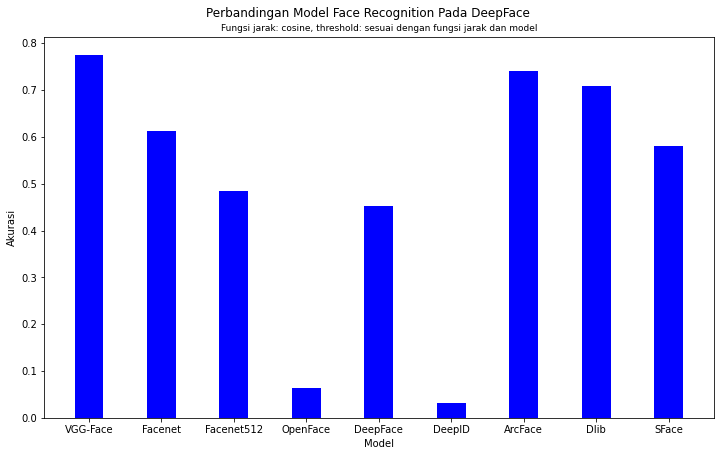

In [ ]:
fig = plt.figure(figsize = (12, 7))
plt.bar(model, hasil_akurasi, color ='blue', width = 0.4)
plt.xlabel("Model")
plt.ylabel("Akurasi")
plt.suptitle("Perbandingan Model Face Recognition Pada DeepFace", y=0.94, fontsize=12)
plt.title("Fungsi jarak: cosine, threshold: sesuai dengan fungsi jarak dan model", fontsize=9)
plt.show()

Contoh data test dan hasil prediksinya

In [ ]:
df_data_test_predict.sample(5)

img_path_aktual    label_foto_aktual  \
17  /content/EL-7007-DeepFace/Data/Data_Test/anggo...     meredita_susanty   
6   /content/EL-7007-DeepFace/Data/Data_Test/anggo...        arief_sartono   
5   /content/EL-7007-DeepFace/Data/Data_Test/anggo...              haaland   
10  /content/EL-7007-DeepFace/Data/Data_Test/anggo...  rahman_indra_kesuma   
9   /content/EL-7007-DeepFace/Data/Data_Test/anggo...      riyanto_riyanto   

   anggota_kelas_aktual                                   img_path_predict  \
17                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
6                   yes  /content/EL-7007-DeepFace/Data/Data_Set/non an...   
5                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
10                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
9                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   

     label_foto_predict anggota_kelas_predict  distance  
17     meredita_susanty                   yes  0.420870  
6                 silas                    no  0.562598  
5         leni_fitriani                   yes  0.421514  
10  rahman_indra_kesuma                   yes  0.509585  
9       riyanto_riyanto                   yes  0.363407

### Dataset Perbandingan Model dan Metode Face Detector

Dengan menggunakan 3 model dengan memiliki akurasi terbaik pada data test, maka dilakukan proses eksperimen pada tekenik face detektor. Hal ini untuk mengetahui metode face detektor terbaik dari pada 3 model tersebut

Format nama file dataset: 
```
df2_data_m:NAMA_MODEL_REPRESENTASI_WAJAH_f_detect:TEKNIK_DETEKSI_WAJAH.csv
```

Contoh:

```
df2_data_m:ArcFace_f_detect:opencv.csv
df2_data_m:DeepFace_f_detect:opencv.csv
```

In [ ]:
# Code untuk membuat dataset analisis
# Dataset Perbandingan Model dengan backend face detector
# Set runtime to GPU RAM

%pip install mediapipe

backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
model = ["VGG-Face", "ArcFace", "Dlib"]

for m in model:
  model_build = load_model(m) 
  if m == 'Dlib' or  m == 'SFace':
    input_shape = functions.find_input_shape(model_build)
  else:
    input_shape = model_build.input_shape[1:3]

  for b in backends:
    # Mendefinisikan dataset model untuk class "anggota kelas"
    data_anggota_kelas = read_directory(path_train + "anggota kelas")
    data_result_preprocess = preprocess_face(model_build, data_anggota_kelas, input_shape, enforce_detection=False, detector_backend=b)
    df_anggota_kelas = pd.DataFrame(data_result_preprocess, columns = ["label_foto", "img_path","face_detector_"+b, "embedding_"+ m])
    df_anggota_kelas['anggota_kelas'] = "yes"

    # Mendefinisikan dataset model untuk class "non anggota kelas"
    data_anggota_kelas = read_directory(path_train + "non anggota kelas")
    data_result_preprocess = preprocess_face(model_build, data_anggota_kelas, input_shape, enforce_detection=False, detector_backend=b)
    df_non_anggota_kelas = pd.DataFrame(data_result_preprocess, columns = ["label_foto", "img_path","face_detector_"+b, "embedding_"+ m])
    df_non_anggota_kelas['anggota_kelas'] = "no"

    # Join
    df = pd.concat([df_anggota_kelas, df_non_anggota_kelas]).reset_index(drop = True)
  
    # save file
    path_save = path_train + "df2_data_m:"+m+"_f_detect:"+b+".csv"
    df.to_pickle(path_save)
    print("Data disimpan di: " + path_save)

     |████████████████████████████████| 32.8 MB 1.2 MB/s 


100%|██████████| 16/16 [00:04<00:00,  3.27it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:VGG-Face_f_detect:opencv.csv


  0%|          | 0/25 [00:00<?, ?it/s]

deploy.prototxt will be downloaded...


Downloading...
From: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
To: /root/.deepface/weights/deploy.prototxt

28.1kB [00:00, 30.9MB/s]                   


res10_300x300_ssd_iter_140000.caffemodel will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
To: /root/.deepface/weights/res10_300x300_ssd_iter_140000.caffemodel

100%|██████████| 10.7M/10.7M [00:00<00:00, 195MB/s]
100%|██████████| 16/16 [00:03<00:00,  4.57it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:VGG-Face_f_detect:ssd.csv


  0%|          | 0/25 [00:00<?, ?it/s]

shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded


Downloading...
From: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
To: /root/.deepface/weights/shape_predictor_5_face_landmarks.dat.bz2

  0%|          | 0.00/5.71M [00:00<?, ?B/s]
  9%|▉         | 524k/5.71M [00:01<00:13, 390kB/s]
 18%|█▊        | 1.05M/5.71M [00:01<00:07, 640kB/s]
 28%|██▊       | 1.57M/5.71M [00:02<00:04, 958kB/s]
 46%|████▌     | 2.62M/5.71M [00:02<00:01, 1.73MB/s]
 64%|██████▍   | 3.67M/5.71M [00:02<00:00, 2.42MB/s]
100%|██████████| 5.71M/5.71M [00:02<00:00, 2.10MB/s]
100%|██████████| 16/16 [00:07<00:00,  2.24it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:VGG-Face_f_detect:dlib.csv


100%|██████████| 16/16 [00:18<00:00,  1.15s/it]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:VGG-Face_f_detect:mtcnn.csv


  0%|          | 0/25 [00:00<?, ?it/s]

retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5

  0%|          | 0.00/119M [00:00<?, ?B/s]
  4%|▍         | 4.72M/119M [00:00<00:05, 20.6MB/s]
  7%|▋         | 7.86M/119M [00:00<00:06, 17.1MB/s]
  8%|▊         | 9.96M/119M [00:00<00:08, 13.2MB/s]
 11%|█         | 13.1M/119M [00:00<00:07, 13.3MB/s]
 14%|█▍        | 16.8M/119M [00:01<00:06, 14.6MB/s]
 15%|█▌        | 18.4M/119M [00:01<00:08, 11.8MB/s]
 18%|█▊        | 21.5M/119M [00:01<00:07, 12.4MB/s]
 21%|██        | 25.2M/119M [00:01<00:06, 13.7MB/s]
 23%|██▎       | 26.7M/119M [00:02<00:08, 11.4MB/s]
 25%|██▌       | 29.9M/119M [00:02<00:07, 12.1MB/s]
 28%|██▊       | 33.0M/119M [00:02<00:06, 12.7MB/s]
 29%|██▉       | 34.6M/119M [00:02<00:07, 10.9MB/s]
 32%|███▏      | 38.3M/119M [00:02<00:06, 12.3MB/s]
 35%|███▍      | 41.4M/119M [00:03<00:05, 13.0MB/s]
 36%|███▌      | 43.0M/119M [00:03<00:06, 11.0MB/s]
 39%|███▉      | 46.7M/119M [00:

Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:VGG-Face_f_detect:retinaface.csv


100%|██████████| 16/16 [00:02<00:00,  7.84it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:VGG-Face_f_detect:mediapipe.csv


100%|██████████| 16/16 [00:03<00:00,  4.02it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:ArcFace_f_detect:opencv.csv


100%|██████████| 16/16 [00:02<00:00,  6.12it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:ArcFace_f_detect:ssd.csv


100%|██████████| 16/16 [00:06<00:00,  2.61it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:ArcFace_f_detect:dlib.csv


100%|██████████| 16/16 [00:11<00:00,  1.41it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:ArcFace_f_detect:mtcnn.csv


100%|██████████| 16/16 [00:03<00:00,  4.54it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:ArcFace_f_detect:retinaface.csv


100%|██████████| 16/16 [00:01<00:00, 12.75it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:ArcFace_f_detect:mediapipe.csv


100%|██████████| 16/16 [00:03<00:00,  5.20it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:Dlib_f_detect:opencv.csv


100%|██████████| 16/16 [00:01<00:00,  9.54it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:Dlib_f_detect:ssd.csv


100%|██████████| 16/16 [00:05<00:00,  3.07it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:Dlib_f_detect:dlib.csv


100%|██████████| 16/16 [00:09<00:00,  1.65it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:Dlib_f_detect:mtcnn.csv


100%|██████████| 16/16 [00:02<00:00,  6.08it/s]


Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:Dlib_f_detect:retinaface.csv


100%|██████████| 16/16 [00:00<00:00, 63.75it/s]

Data disimpan di: /content/EL-7007-DeepFace/Data/Data_Set/df2_data_m:Dlib_f_detect:mediapipe.csv


### Menghitung Akurasi Model Face Recognition dan Metode Face Detector

Proses perhitungan akurasi berdasarkan pada data test yang telah dibuat. Berikut data test yang dibuat dalam eksperimen ini

In [ ]:
data_anggota_kelas_test = read_directory_file_name(path_test + "anggota kelas")
df_anggota_kelas_test = pd.DataFrame(data_anggota_kelas_test, columns = [ "img_path_aktual", "label_foto_aktual"])
df_anggota_kelas_test['anggota_kelas_aktual'] = "yes"
data_non_anggota_kelas_test = read_directory_file_name(path_test + "non anggota kelas")
df_non_anggota_kelas_test = pd.DataFrame(data_non_anggota_kelas_test, columns = [ "img_path_aktual", "label_foto_aktual"])
df_non_anggota_kelas_test['anggota_kelas_aktual'] = "no"
df_data_test = pd.concat([df_anggota_kelas_test, df_non_anggota_kelas_test]).reset_index(drop = True)
df_data_test.head()

img_path_aktual    label_foto_aktual  \
0  /content/EL-7007-DeepFace/Data/Data_Test/anggo...  hartanto_tantriawan   
1  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       lathifah_arief   
2  /content/EL-7007-DeepFace/Data/Data_Test/anggo...        leni_fitriani   
3  /content/EL-7007-DeepFace/Data/Data_Test/anggo...    imam_ekowicaksono   
4  /content/EL-7007-DeepFace/Data/Data_Test/anggo...     mina_ismu_rahayu   

  anggota_kelas_aktual  
0                  yes  
1                  yes  
2                  yes  
3                  yes  
4                  yes

deskripsi data test

In [ ]:
print("Jumlah Data:" + str(len(df_data_test)) )
yes_df = df_data_test[df_data_test['anggota_kelas_aktual'] == 'yes'] 
print("Jumlah Data Anggota Kelas:" + str(len(yes_df)) )
no_df = df_data_test[df_data_test['anggota_kelas_aktual'] == 'no'] 
print("Jumlah Data Non Anggota Kelas:" + str(len(no_df)) )

Jumlah Data:31
Jumlah Data Anggota Kelas:18
Jumlah Data Non Anggota Kelas:13


Menghitung akurasi model face recognition berdasarkan data test dengan **fungsi jarak "cosine"** dan **threshold sesuai dengan fungsi jarak dan model yang terdapat pada deepface**


In [ ]:
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
model = ["VGG-Face", "ArcFace", "Dlib"] #

hasil_akurasi_opencv = []
hasil_akurasi_ssd = []
hasil_akurasi_dlib = []
hasil_akurasi_mtcnn = []
hasil_akurasi_retinaface = []
hasil_akurasi_mediapipe = []

for m in tqdm(model):
    model_build = load_model(m) 
    if m == 'Dlib' or  m == 'SFace':
      input_shape = functions.find_input_shape(model_build)
    else:
      input_shape = model_build.input_shape[1:3]

    for b in backends:
      # Load database kelas dan non kelas
      df_data_set = pd.read_pickle(path_train+'df2_data_m:'+m+'_f_detect:'+b+'.csv') #database

      df_data_predicts = []
      for i, r in df_data_test.iterrows():
          img_test_representation = preprocess_face_DataTest(model_build,  r['img_path_aktual'], input_shape, enforce_detection=False,detector_backend=b)
          
          distances = []
          for index, row in df_data_set.iterrows(): # cek in database
              dist_ = dst.findCosineDistance (np.array(row['embedding_'+m]).astype('float'), img_test_representation[1])  
              distance = []
              distance.append(row['img_path'])
              distance.append(row['label_foto'])
              distance.append(row['anggota_kelas'])
              distance.append(dist_)
              distances.append(distance)

          df_distance = pd.DataFrame(distances, columns = ["img_path_predict","label_foto_predict","anggota_kelas_predict","distance"])
          threshold = dst.findThreshold(m, 'cosine') # 0.4
          df_data_predict_threshold = df_distance[df_distance["distance"] <= threshold].sort_values(by=["distance"], ascending=True).reset_index(drop=True)
          
          df_data_predict = []
          if(len(df_data_predict_threshold)> 0):
            # Ambil baris pertama - Nilai distance yang paling kecil
            df_data_predict.append(df_data_predict_threshold.iloc[0]['img_path_predict'])
            df_data_predict.append(df_data_predict_threshold.iloc[0]['label_foto_predict'])
            df_data_predict.append(df_data_predict_threshold.iloc[0]['anggota_kelas_predict'])
            df_data_predict.append(df_data_predict_threshold.iloc[0]['distance'])
          else:
            df_data_predict.append(None)
            df_data_predict.append(None)
            df_data_predict.append("No")
            df_data_predict.append(None)
          df_data_predicts.append(df_data_predict)

      df_data_predicts_rst = pd.DataFrame(df_data_predicts, columns = ["img_path_predict","label_foto_predict","anggota_kelas_predict","distance"])
      df_data_test_predict_model_detektor = pd.concat([df_data_test, df_data_predicts_rst], axis=1)

      label_actual = df_data_test_predict_model_detektor['anggota_kelas_aktual'].tolist()
      label_predict = df_data_test_predict_model_detektor['anggota_kelas_predict'].tolist()
      accuracy = accuracy_score(label_actual, label_predict)
      
      if b == 'opencv':
        hasil_akurasi_opencv.append(accuracy)
      if b == 'ssd':
        hasil_akurasi_ssd.append(accuracy)
      if b == 'dlib':
        hasil_akurasi_dlib.append(accuracy)
      if b == 'mtcnn':
        hasil_akurasi_mtcnn.append(accuracy)
      if b == 'retinaface':
        hasil_akurasi_retinaface.append(accuracy)
      if b == 'mediapipe':
        hasil_akurasi_mediapipe.append(accuracy)

100%|██████████| 3/3 [05:01<00:00, 100.55s/it]


In [ ]:
print(hasil_akurasi_opencv)
print(hasil_akurasi_ssd)
print(hasil_akurasi_dlib)
print(hasil_akurasi_mtcnn)
print(hasil_akurasi_retinaface)
print(hasil_akurasi_mediapipe)

[0.7741935483870968, 0.7419354838709677, 0.7096774193548387]
[0.8064516129032258, 0.8064516129032258, 0.5483870967741935]
[0.9032258064516129, 0.8709677419354839, 0.8387096774193549]
[0.8387096774193549, 0.8387096774193549, 0.7419354838709677]
[0.8387096774193549, 0.8387096774193549, 0.6129032258064516]
[0.6451612903225806, 0.6129032258064516, 0.5161290322580645]


In [ ]:
import re
def truncate(num):
    return re.sub(r'^(\d+\.\d{,2})\d*$',r'\1',str(num))
    
hasil_akurasi_opencv = [ float(truncate(x * 100)) for x in hasil_akurasi_opencv]
hasil_akurasi_ssd = [float(truncate(x * 100)) for x in hasil_akurasi_ssd]
hasil_akurasi_dlib = [float(truncate(x * 100)) for x in hasil_akurasi_dlib]
hasil_akurasi_mtcnn = [float(truncate(x * 100)) for x in hasil_akurasi_mtcnn]
hasil_akurasi_retinaface = [float(truncate(x * 100)) for x in hasil_akurasi_retinaface]
hasil_akurasi_mediapipe = [float(truncate(x * 100)) for x in hasil_akurasi_mediapipe]

Menampilkan hasil akurasi dalam bentuk grafik bar

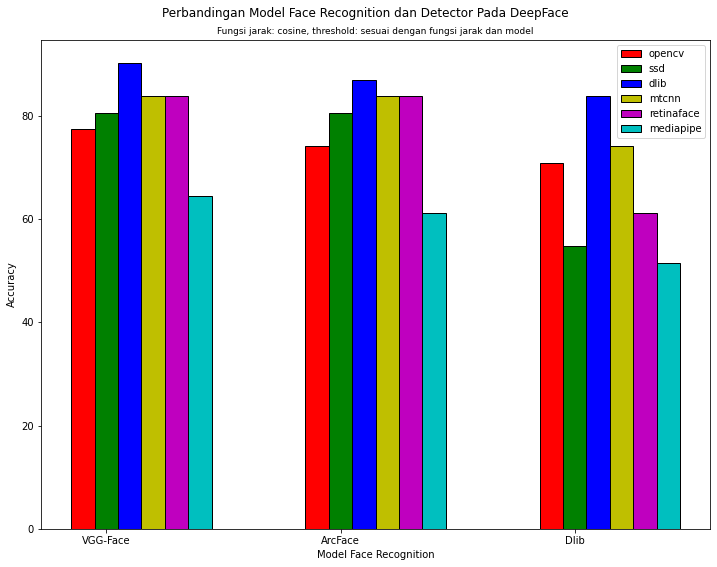

In [ ]:
model = ["VGG-Face", "ArcFace", "Dlib"]

barWidth = 0.10
fig = plt.subplots(figsize =(12, 9))

IT = hasil_akurasi_opencv
ECE = hasil_akurasi_ssd
CSE = hasil_akurasi_dlib
CSX = hasil_akurasi_mtcnn
CSY = hasil_akurasi_retinaface
CSW = hasil_akurasi_mediapipe
 
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
 
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='black', label ='opencv')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='black', label ='ssd')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='black', label ='dlib')
plt.bar(br4, CSX, color ='y', width = barWidth,
        edgecolor ='black', label ='mtcnn')
plt.bar(br5, CSY, color ='m', width = barWidth,
        edgecolor ='black', label ='retinaface')
plt.bar(br6, CSW, color ='c', width = barWidth,
        edgecolor ='black', label ='mediapipe')
 
plt.xlabel("Model Face Recognition")
plt.ylabel('Accuracy')
plt.suptitle("Perbandingan Model Face Recognition dan Detector Pada DeepFace", y=0.93, fontsize=12)
plt.title("Fungsi jarak: cosine, threshold: sesuai dengan fungsi jarak dan model", fontsize=9)
plt.xticks([r + barWidth for r in range(len(IT))],model)
 
plt.legend()
plt.show()

Contoh data test dan hasil prediksinya

In [ ]:
df_data_test_predict_model_detektor

img_path_aktual      label_foto_aktual  \
0   /content/EL-7007-DeepFace/Data/Data_Test/anggo...    hartanto_tantriawan   
1   /content/EL-7007-DeepFace/Data/Data_Test/anggo...         lathifah_arief   
2   /content/EL-7007-DeepFace/Data/Data_Test/anggo...          leni_fitriani   
3   /content/EL-7007-DeepFace/Data/Data_Test/anggo...      imam_ekowicaksono   
4   /content/EL-7007-DeepFace/Data/Data_Test/anggo...       mina_ismu_rahayu   
5   /content/EL-7007-DeepFace/Data/Data_Test/anggo...                haaland   
6   /content/EL-7007-DeepFace/Data/Data_Test/anggo...          arief_sartono   
7   /content/EL-7007-DeepFace/Data/Data_Test/anggo...       varuliantor-dear   
8   /content/EL-7007-DeepFace/Data/Data_Test/anggo...       adiyasa_nurfalah   
9   /content/EL-7007-DeepFace/Data/Data_Test/anggo...        riyanto_riyanto   
10  /content/EL-7007-DeepFace/Data/Data_Test/anggo...    rahman_indra_kesuma   
11  /content/EL-7007-DeepFace/Data/Data_Test/anggo...         handoko_supeno   
12  /content/EL-7007-DeepFace/Data/Data_Test/anggo...           meza_silvana   
13  /content/EL-7007-DeepFace/Data/Data_Test/anggo...     ahmad_luky_ramdani   
14  /content/EL-7007-DeepFace/Data/Data_Test/anggo...        dewi_tresnawati   
15  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       ricky_isfandiari   
16  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       adiyasa_nurfalah   
17  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       meredita_susanty   
18  /content/EL-7007-DeepFace/Data/Data_Test/non a...     Volodymyr_Zelensky   
19  /content/EL-7007-DeepFace/Data/Data_Test/non a...         Vladimir_Putin   
20  /content/EL-7007-DeepFace/Data/Data_Test/non a...                haaland   
21  /content/EL-7007-DeepFace/Data/Data_Test/non a...     airin_rachmi_diany   
22  /content/EL-7007-DeepFace/Data/Data_Test/non a...               revalina   
23  /content/EL-7007-DeepFace/Data/Data_Test/non a...           sandiaga_uno   
24  /content/EL-7007-DeepFace/Data/Data_Test/non a...                 gozali   
25  /content/EL-7007-DeepFace/Data/Data_Test/non a...              Elon_Musk   
26  /content/EL-7007-DeepFace/Data/Data_Test/non a...           ridwan_kamil   
27  /content/EL-7007-DeepFace/Data/Data_Test/non a...                    sby   
28  /content/EL-7007-DeepFace/Data/Data_Test/non a...  sri_mulyani_indrawati   
29  /content/EL-7007-DeepFace/Data/Data_Test/non a...               galgadot   
30  /content/EL-7007-DeepFace/Data/Data_Test/non a...           maudy_ayunda   

   anggota_kelas_aktual                                   img_path_predict  \
0                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
1                   yes                                               None   
2                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
3                   yes                                               None   
4                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
5                   yes                                               None   
6                   yes  /content/EL-7007-DeepFace/Data/Data_Set/non an...   
7                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
8                   yes  /content/EL-7007-DeepFace/Data/Data_Set/non an...   
9                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
10                  yes  /content/EL-7007-DeepFace/Data/Data_Set/non an...   
11                  yes  /content/EL-7007-DeepFace/Data/Data_Set/non an...   
12                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
13                  yes  /content/EL-7007-DeepFace/Data/Data_Set/non an...   
14                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
15                  yes  /content/EL-7007-DeepFace/Data/Data_Set/non an...   
16                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
17                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot..

## Analisis Fungsi Jarak

Dengan menggunakan 3 model dan teknik face detektor dengan memiliki akurasi terbaik pada data test dari proses sebelumnya, maka dilakukan proses eksperimen pada jenis fungsi jarak yang digunakan. Hal ini untuk mengetahui fungsi jarak terbaik yang digunakan. Sehingga pada eksperimen ini menggunakan Dataset Perbandingan Model dan Metode Face Detector. Adapun model face recognition + metode face detector yang digunakan adalah:

1. VGG-Face + dlib
2. ArcFace + dlib
3. Dlib + dlib

Sedangkan fungsi jarak yang akan dianalisis adalah:
1. Cosine
2. Euclidean
3. Euclidean_l2

### Menghitung Akurasi pada Fungsi Jarak

Proses perhitungan akurasi berdasarkan pada data test yang telah dibuat. Berikut data test yang dibuat dalam eksperimen ini

In [ ]:
data_anggota_kelas_test = read_directory_file_name(path_test + "anggota kelas")
df_anggota_kelas_test = pd.DataFrame(data_anggota_kelas_test, columns = [ "img_path_aktual", "label_foto_aktual"])
df_anggota_kelas_test['anggota_kelas_aktual'] = "yes"
data_non_anggota_kelas_test = read_directory_file_name(path_test + "non anggota kelas")
df_non_anggota_kelas_test = pd.DataFrame(data_non_anggota_kelas_test, columns = [ "img_path_aktual", "label_foto_aktual"])
df_non_anggota_kelas_test['anggota_kelas_aktual'] = "no"
df_data_test = pd.concat([df_anggota_kelas_test, df_non_anggota_kelas_test]).reset_index(drop = True)
df_data_test.head()

img_path_aktual    label_foto_aktual  \
0  /content/EL-7007-DeepFace/Data/Data_Test/anggo...  hartanto_tantriawan   
1  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       lathifah_arief   
2  /content/EL-7007-DeepFace/Data/Data_Test/anggo...        leni_fitriani   
3  /content/EL-7007-DeepFace/Data/Data_Test/anggo...    imam_ekowicaksono   
4  /content/EL-7007-DeepFace/Data/Data_Test/anggo...     mina_ismu_rahayu   

  anggota_kelas_aktual  
0                  yes  
1                  yes  
2                  yes  
3                  yes  
4                  yes

deskripsi data

In [ ]:
print("Jumlah Data:" + str(len(df_data_test)) )
yes_df = df_data_test[df_data_test['anggota_kelas_aktual'] == 'yes'] 
print("Jumlah Data Anggota Kelas:" + str(len(yes_df)) )
no_df = df_data_test[df_data_test['anggota_kelas_aktual'] == 'no'] 
print("Jumlah Data Non Anggota Kelas:" + str(len(no_df)) )

Jumlah Data:31
Jumlah Data Anggota Kelas:18
Jumlah Data Non Anggota Kelas:13


Menghitung akurasi model face recognition berdasarkan data test dengan **fungsi jarak** dan **threshold sesuai dengan fungsi jarak yang digunakan**


In [ ]:
distance_function = ['cosine', 'euclidean', 'euclidean_l2']
best_model_detector = ['VGG-Face_dlib',
                       'ArcFace_dlib',
                       'Dlib_dlib' ]
hasil_akurasi_cosine = []
hasil_akurasi_euclidean = []
hasil_akurasi_euclidean_l2 = []

for bmd in tqdm(best_model_detector):
    
    mode_detector = bmd.split('_')
    m = mode_detector[0]
    b = mode_detector[1]

    model_build = load_model(m) 
    if m == 'Dlib' or  m == 'SFace':
      input_shape = functions.find_input_shape(model_build)
    else:
      input_shape = model_build.input_shape[1:3]

    # Load database kelas dan non kelas
    df_data_set = pd.read_pickle(path_train+'df2_data_m:'+m+'_f_detect:'+b+'.csv') #database

    for d in distance_function:
      df_data_predicts = []
      for i, r in df_data_test.iterrows():
          img_test_representation = preprocess_face_DataTest(model_build,  r['img_path_aktual'], input_shape, enforce_detection=False,detector_backend=b)
          distances = []
          for index, row in df_data_set.iterrows(): # cek in database
              dist_ = dst.findCosineDistance (np.array(row['embedding_'+m]).astype('float'), img_test_representation[1])  
              distance = []
              distance.append(row['img_path'])
              distance.append(row['label_foto'])
              distance.append(row['anggota_kelas'])
              distance.append(dist_)
              distances.append(distance)

          df_distance = pd.DataFrame(distances, columns = ["img_path_predict","label_foto_predict","anggota_kelas_predict","distance"])
          threshold = dst.findThreshold(m, d) # sesui dengan fungsi jarak
          df_data_predict_threshold = df_distance[df_distance["distance"] <= threshold].sort_values(by=["distance"], ascending=True).reset_index(drop=True)
          
          df_data_predict = []
          if(len(df_data_predict_threshold)> 0):
            # Ambil baris pertama - Nilai distance yang paling kecil
            df_data_predict.append(df_data_predict_threshold.iloc[0]['img_path_predict'])
            df_data_predict.append(df_data_predict_threshold.iloc[0]['label_foto_predict'])
            df_data_predict.append(df_data_predict_threshold.iloc[0]['anggota_kelas_predict'])
            df_data_predict.append(df_data_predict_threshold.iloc[0]['distance'])
          else:
            df_data_predict.append(None)
            df_data_predict.append(None)
            df_data_predict.append("No")
            df_data_predict.append(None)
          df_data_predicts.append(df_data_predict)

      df_data_predicts_rst = pd.DataFrame(df_data_predicts, columns = ["img_path_predict","label_foto_predict","anggota_kelas_predict","distance"])
      df_data_test_predict = pd.concat([df_data_test, df_data_predicts_rst], axis=1)

      label_actual = df_data_test_predict['anggota_kelas_aktual'].tolist()
      label_predict = df_data_test_predict['anggota_kelas_predict'].tolist()
      accuracy = accuracy_score(label_actual, label_predict)
      if d == 'cosine':
        hasil_akurasi_cosine.append(accuracy)
      if d == 'cosine':
        hasil_akurasi_euclidean.append(accuracy)
      if d == 'euclidean_l2':
        hasil_akurasi_euclidean_l2.append(accuracy)

100%|██████████| 3/3 [03:59<00:00, 79.84s/it]


In [ ]:
print(hasil_akurasi_cosine)
print(hasil_akurasi_euclidean)
print(hasil_akurasi_euclidean_l2)

[0.9032258064516129, 0.8709677419354839, 0.8387096774193549]
[0.9032258064516129, 0.8709677419354839, 0.8387096774193549]
[0.9032258064516129, 0.9032258064516129, 0.8709677419354839]


In [ ]:
import re
def truncate(num):
    return re.sub(r'^(\d+\.\d{,2})\d*$',r'\1',str(num))
    
hasil_akurasi_cosine = [ float(truncate(x * 100)) for x in hasil_akurasi_cosine]
hasil_akurasi_euclidean = [float(truncate(x * 100)) for x in hasil_akurasi_euclidean]
hasil_akurasi_euclidean_l2 = [float(truncate(x * 100)) for x in hasil_akurasi_euclidean_l2]

Menampilkan hasil akurasi dalam bentuk grafik bar

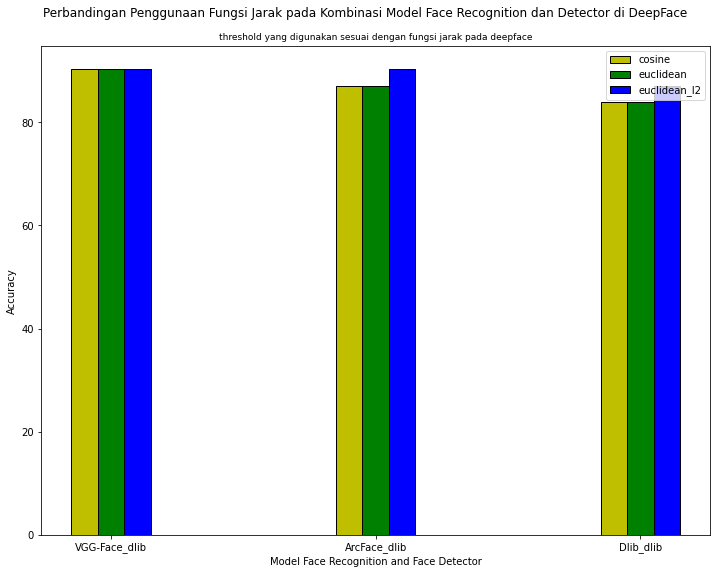

In [ ]:
best_model_detector = ['VGG-Face_dlib',
                       'ArcFace_dlib',
                       'Dlib_dlib' ]

barWidth = 0.10
fig = plt.subplots(figsize =(12, 9))

IT = hasil_akurasi_cosine
ECE = hasil_akurasi_euclidean
CSE = hasil_akurasi_euclidean_l2
 
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
plt.bar(br1, IT, color ='y', width = barWidth,
        edgecolor ='black', label ='cosine')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='black', label ='euclidean')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='black', label ='euclidean_l2')
 
plt.xlabel("Model Face Recognition and Face Detector")
plt.ylabel('Accuracy')
plt.suptitle("Perbandingan Penggunaan Fungsi Jarak pada Kombinasi Model Face Recognition dan Detector di DeepFace", y=0.94, fontsize=12)
plt.title("threshold yang digunakan sesuai dengan fungsi jarak pada deepface", fontsize=9)
plt.xticks([r + barWidth for r in range(len(IT))], best_model_detector)
 
plt.legend()
plt.show()

# Implementasi


Pada implementasi sistem mampu mengidetifikasi wajah dengan alur sebagai berikut:

1. Jika sistem berhasil mengenali wajah: `<Foto+Label dari Test Data> <Foto+Label dari Database pas foto> Benar/Salah`

2. Jika sistem tidak berhasil mengenali wajah: `<Foto+Label Test Data> Unknown Benar/Salah `

## Menampilkan Data yang Berhasil dan Gagal Diklasifikasikan

Pada proses implementasi menggunakan 
1. Model face recognition **VGG-Face**
2. Face detector **dlib**
3. Fungsi jarak **cosine**

In [ ]:
data_anggota_kelas_test = read_directory_file_name(path_test + "anggota kelas")
df_anggota_kelas_test = pd.DataFrame(data_anggota_kelas_test, columns = [ "img_path_aktual", "label_foto_aktual"])
df_anggota_kelas_test['anggota_kelas_aktual'] = "yes"
data_non_anggota_kelas_test = read_directory_file_name(path_test + "non anggota kelas")
df_non_anggota_kelas_test = pd.DataFrame(data_non_anggota_kelas_test, columns = [ "img_path_aktual", "label_foto_aktual"])
df_non_anggota_kelas_test['anggota_kelas_aktual'] = "no"
df_data_test = pd.concat([df_anggota_kelas_test, df_non_anggota_kelas_test]).reset_index(drop = True)
df_data_test

img_path_aktual      label_foto_aktual  \
0   /content/EL-7007-DeepFace/Data/Data_Test/anggo...    hartanto_tantriawan   
1   /content/EL-7007-DeepFace/Data/Data_Test/anggo...         lathifah_arief   
2   /content/EL-7007-DeepFace/Data/Data_Test/anggo...          leni_fitriani   
3   /content/EL-7007-DeepFace/Data/Data_Test/anggo...      imam_ekowicaksono   
4   /content/EL-7007-DeepFace/Data/Data_Test/anggo...       mina_ismu_rahayu   
5   /content/EL-7007-DeepFace/Data/Data_Test/anggo...                haaland   
6   /content/EL-7007-DeepFace/Data/Data_Test/anggo...          arief_sartono   
7   /content/EL-7007-DeepFace/Data/Data_Test/anggo...       varuliantor-dear   
8   /content/EL-7007-DeepFace/Data/Data_Test/anggo...       adiyasa_nurfalah   
9   /content/EL-7007-DeepFace/Data/Data_Test/anggo...        riyanto_riyanto   
10  /content/EL-7007-DeepFace/Data/Data_Test/anggo...    rahman_indra_kesuma   
11  /content/EL-7007-DeepFace/Data/Data_Test/anggo...         handoko_supeno   
12  /content/EL-7007-DeepFace/Data/Data_Test/anggo...           meza_silvana   
13  /content/EL-7007-DeepFace/Data/Data_Test/anggo...     ahmad_luky_ramdani   
14  /content/EL-7007-DeepFace/Data/Data_Test/anggo...        dewi_tresnawati   
15  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       ricky_isfandiari   
16  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       adiyasa_nurfalah   
17  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       meredita_susanty   
18  /content/EL-7007-DeepFace/Data/Data_Test/non a...     Volodymyr_Zelensky   
19  /content/EL-7007-DeepFace/Data/Data_Test/non a...         Vladimir_Putin   
20  /content/EL-7007-DeepFace/Data/Data_Test/non a...                haaland   
21  /content/EL-7007-DeepFace/Data/Data_Test/non a...     airin_rachmi_diany   
22  /content/EL-7007-DeepFace/Data/Data_Test/non a...               revalina   
23  /content/EL-7007-DeepFace/Data/Data_Test/non a...           sandiaga_uno   
24  /content/EL-7007-DeepFace/Data/Data_Test/non a...                 gozali   
25  /content/EL-7007-DeepFace/Data/Data_Test/non a...              Elon_Musk   
26  /content/EL-7007-DeepFace/Data/Data_Test/non a...           ridwan_kamil   
27  /content/EL-7007-DeepFace/Data/Data_Test/non a...                    sby   
28  /content/EL-7007-DeepFace/Data/Data_Test/non a...  sri_mulyani_indrawati   
29  /content/EL-7007-DeepFace/Data/Data_Test/non a...               galgadot   
30  /content/EL-7007-DeepFace/Data/Data_Test/non a...           maudy_ayunda   

   anggota_kelas_aktual  
0                   yes  
1                   yes  
2                   yes  
3                   yes  
4                   yes  
5                   yes  
6                   yes  
7                   yes  
8                   yes  
9                   yes  
10                  yes  
11                  yes  
12                  yes  
13                  yes  
14                  yes  
15                  yes  
16                  yes  
17                  yes  
18                   no  
19                   no  
20                   no  
21                   no  
22                   no  
23                   no  
24                   no  
25                   no  
26                   no  
27                   no  
28                   no  
29                   no  
30                   no

Parameter
1. Model: VGG-Face
2. Face_detector: dlib
3. Fungsi_jarak: cosine


In [ ]:
# {Model:Dlib, Face_detector:dlib, Fungsi_jarak:cosine}
model_build = load_model('VGG-Face') 
if m == 'Dlib' or  m == 'SFace':
  input_shape = functions.find_input_shape(model_build)
else:
  input_shape = model_build.input_shape[1:3]
df_data_set = pd.read_pickle(path_train+'df2_data_m:VGG-Face_f_detect:dlib.csv')
threshold = dst.findThreshold('VGG-Face', 'cosine')
print("threshold: ", threshold)
df_data_predicts = []
for i, r in tqdm(df_data_test.iterrows(), total=df_data_test.shape[0]):
    img_test_representation = preprocess_face_DataTest(model_build,  r['img_path_aktual'], input_shape, enforce_detection=False,detector_backend='dlib')
    distances = []
    for index, row in df_data_set.iterrows():
        dist_ = dst.findCosineDistance (np.array(row['embedding_VGG-Face']).astype('float'), img_test_representation[1])  
        distance = []
        distance.append(row['img_path'])
        distance.append(row['label_foto'])
        distance.append(row['anggota_kelas'])
        distance.append(dist_)
        distances.append(distance)

    df_distance = pd.DataFrame(distances, columns = ["img_path_predict","label_foto_predict","anggota_kelas_predict","distance"])
    df_data_predict_threshold = df_distance[df_distance["distance"] <= threshold].sort_values(by=["distance"], ascending=True).reset_index(drop=True)
    df_data_predict = []
    if(len(df_data_predict_threshold)> 0):
      df_data_predict.append(df_data_predict_threshold.iloc[0]['img_path_predict'])
      df_data_predict.append(df_data_predict_threshold.iloc[0]['label_foto_predict'])
      df_data_predict.append(df_data_predict_threshold.iloc[0]['anggota_kelas_predict'])
      df_data_predict.append(df_data_predict_threshold.iloc[0]['distance'])
    else:
      df_data_predict.append(None)
      df_data_predict.append(None)
      df_data_predict.append("No")
      df_data_predict.append(None)
    df_data_predicts.append(df_data_predict)

df_data_predicts_rst = pd.DataFrame(df_data_predicts, columns = ["img_path_predict","label_foto_predict","anggota_kelas_predict","distance"])
df_data_test_predict = pd.concat([df_data_test, df_data_predicts_rst], axis=1)

label_actual = df_data_test_predict['anggota_kelas_aktual'].tolist()
label_predict = df_data_test_predict['anggota_kelas_predict'].tolist()
accuracy = accuracy_score(label_actual, label_predict)
print("\nAccuracy : {:.4f}%".format(accuracy*100))

threshold:  0.4


100%|██████████| 31/31 [00:32<00:00,  1.05s/it]


Accuracy : 90.3226%


In [ ]:
df_data_test_predict

img_path_aktual      label_foto_aktual  \
0   /content/EL-7007-DeepFace/Data/Data_Test/anggo...    hartanto_tantriawan   
1   /content/EL-7007-DeepFace/Data/Data_Test/anggo...         lathifah_arief   
2   /content/EL-7007-DeepFace/Data/Data_Test/anggo...          leni_fitriani   
3   /content/EL-7007-DeepFace/Data/Data_Test/anggo...      imam_ekowicaksono   
4   /content/EL-7007-DeepFace/Data/Data_Test/anggo...       mina_ismu_rahayu   
5   /content/EL-7007-DeepFace/Data/Data_Test/anggo...                haaland   
6   /content/EL-7007-DeepFace/Data/Data_Test/anggo...          arief_sartono   
7   /content/EL-7007-DeepFace/Data/Data_Test/anggo...       varuliantor-dear   
8   /content/EL-7007-DeepFace/Data/Data_Test/anggo...       adiyasa_nurfalah   
9   /content/EL-7007-DeepFace/Data/Data_Test/anggo...        riyanto_riyanto   
10  /content/EL-7007-DeepFace/Data/Data_Test/anggo...    rahman_indra_kesuma   
11  /content/EL-7007-DeepFace/Data/Data_Test/anggo...         handoko_supeno   
12  /content/EL-7007-DeepFace/Data/Data_Test/anggo...           meza_silvana   
13  /content/EL-7007-DeepFace/Data/Data_Test/anggo...     ahmad_luky_ramdani   
14  /content/EL-7007-DeepFace/Data/Data_Test/anggo...        dewi_tresnawati   
15  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       ricky_isfandiari   
16  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       adiyasa_nurfalah   
17  /content/EL-7007-DeepFace/Data/Data_Test/anggo...       meredita_susanty   
18  /content/EL-7007-DeepFace/Data/Data_Test/non a...     Volodymyr_Zelensky   
19  /content/EL-7007-DeepFace/Data/Data_Test/non a...         Vladimir_Putin   
20  /content/EL-7007-DeepFace/Data/Data_Test/non a...                haaland   
21  /content/EL-7007-DeepFace/Data/Data_Test/non a...     airin_rachmi_diany   
22  /content/EL-7007-DeepFace/Data/Data_Test/non a...               revalina   
23  /content/EL-7007-DeepFace/Data/Data_Test/non a...           sandiaga_uno   
24  /content/EL-7007-DeepFace/Data/Data_Test/non a...                 gozali   
25  /content/EL-7007-DeepFace/Data/Data_Test/non a...              Elon_Musk   
26  /content/EL-7007-DeepFace/Data/Data_Test/non a...           ridwan_kamil   
27  /content/EL-7007-DeepFace/Data/Data_Test/non a...                    sby   
28  /content/EL-7007-DeepFace/Data/Data_Test/non a...  sri_mulyani_indrawati   
29  /content/EL-7007-DeepFace/Data/Data_Test/non a...               galgadot   
30  /content/EL-7007-DeepFace/Data/Data_Test/non a...           maudy_ayunda   

   anggota_kelas_aktual                                   img_path_predict  \
0                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
1                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
2                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
3                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
4                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
5                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
6                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
7                   yes  /content/EL-7007-DeepFace/Data/Data_Set/non an...   
8                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
9                   yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
10                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
11                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
12                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
13                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
14                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
15                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
16                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot...   
17                  yes  /content/EL-7007-DeepFace/Data/Data_Set/anggot..

  0%|          | 0/31 [00:00<?, ?it/s]

/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/hartanto_tantriawan.jpg


 13%|█▎        | 4/31 [00:00<00:04,  6.65it/s]

/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/lathifah_arief.jpg
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/leni_fitriani.jpg
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/imam_ekowicaksono.jpg
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/mina_ismu_rahayu.jpg


 19%|█▉        | 6/31 [00:01<00:05,  4.42it/s]

/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/haaland.png
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/arief_sartono.jpg


 32%|███▏      | 10/31 [00:02<00:03,  5.52it/s]

/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/varuliantor-dear.jpg
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/adiyasa_nurfalah.jpeg
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/riyanto_riyanto.jpeg
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/rahman_indra_kesuma.jpeg


 42%|████▏     | 13/31 [00:02<00:02,  7.47it/s]

/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/handoko_supeno.jpg
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/meza_silvana.jpg
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/ahmad_luky_ramdani.jpg
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/dewi_tresnawati.jpg
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/ricky_isfandiari.jpeg


 58%|█████▊    | 18/31 [00:02<00:01,  9.78it/s]

/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/adiyasa_nurfalah.jpg
/content/EL-7007-DeepFace/Data/Data_Test/anggota kelas/meredita_susanty.jpg
/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/Volodymyr_Zelensky.jpeg
/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/Vladimir_Putin.jpeg


 74%|███████▍  | 23/31 [00:02<00:00, 12.36it/s]

/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/haaland.png
/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/airin_rachmi_diany.jpeg
/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/revalina.jpeg
/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/sandiaga_uno.jpeg


 87%|████████▋ | 27/31 [00:03<00:00, 13.99it/s]

/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/gozali.jpeg
/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/Elon_Musk.jpeg
/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/ridwan_kamil.jpeg
/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/sby.jpeg


100%|██████████| 31/31 [00:03<00:00,  9.00it/s]

/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/sri_mulyani_indrawati.jpeg
/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/galgadot.jpeg
/content/EL-7007-DeepFace/Data/Data_Test/non anggota kelas/maudy_ayunda.jpeg


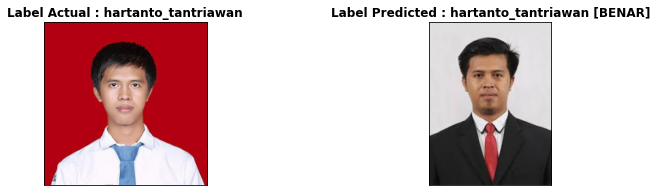

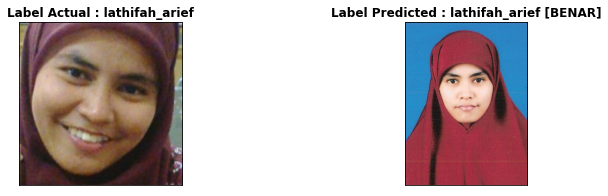

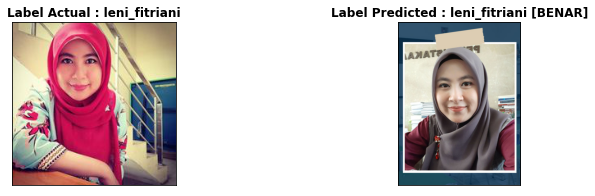

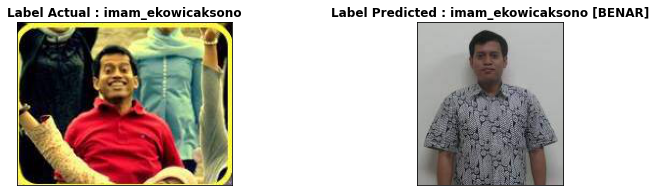

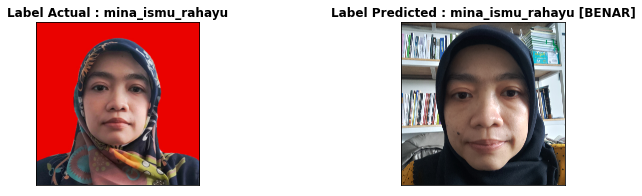

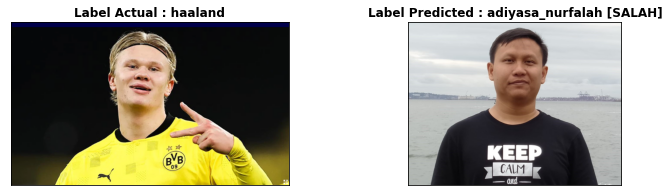

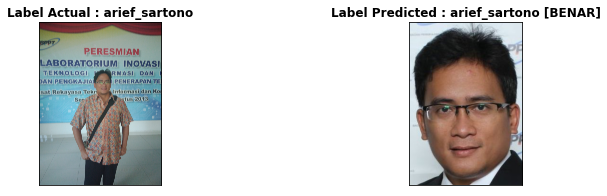

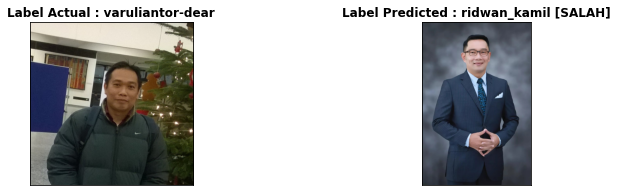

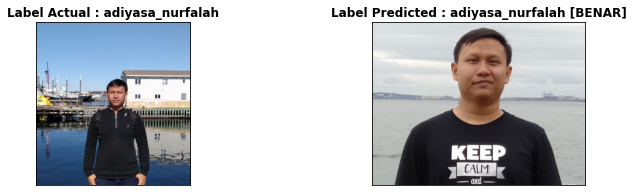

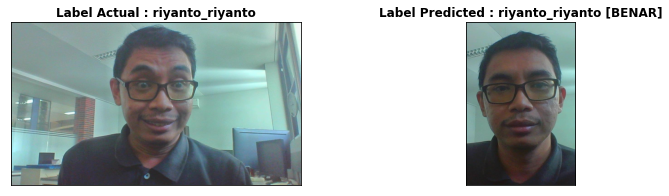

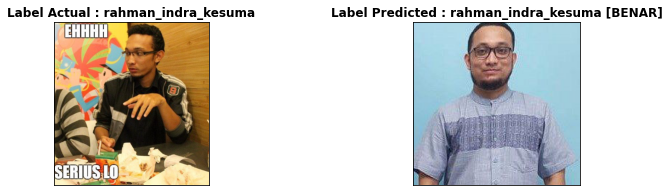

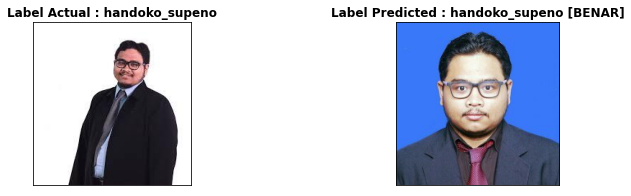

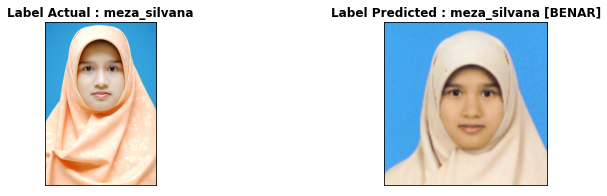

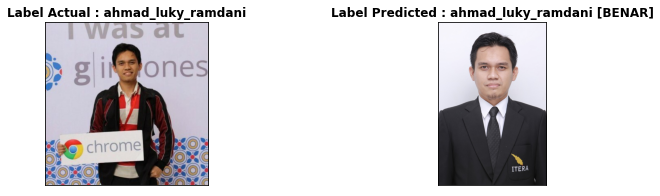

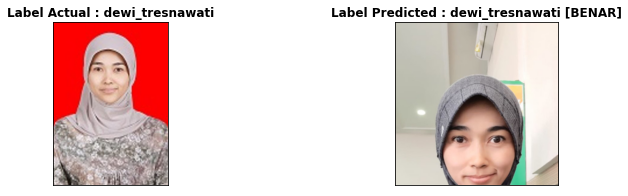

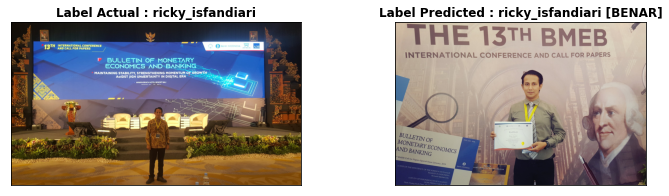

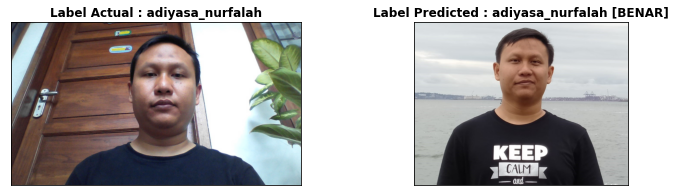

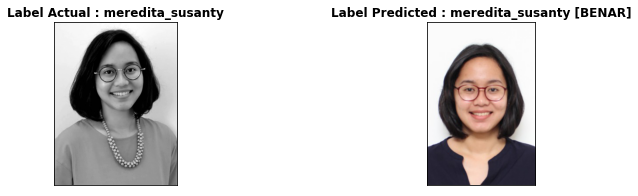

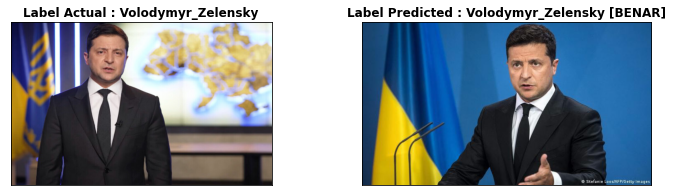

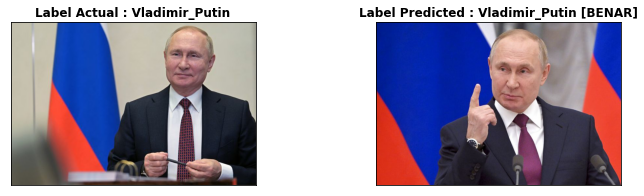

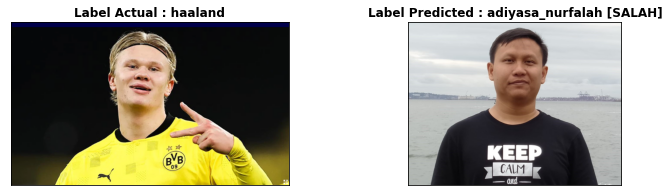

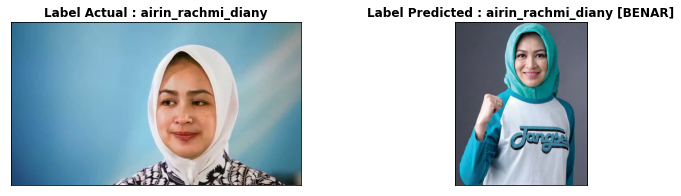

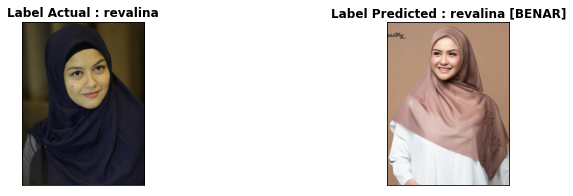

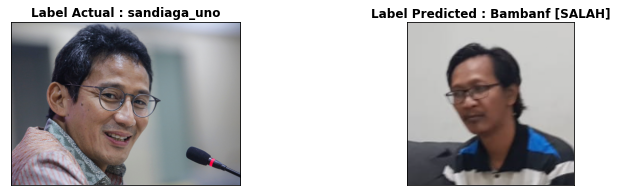

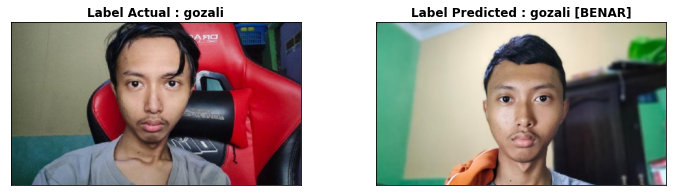

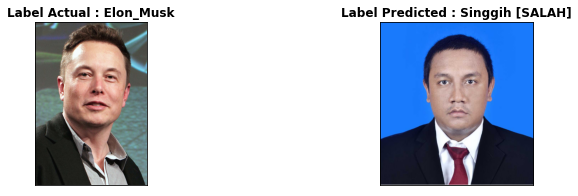

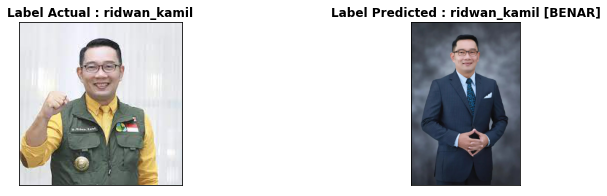

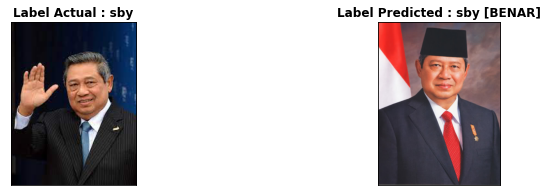

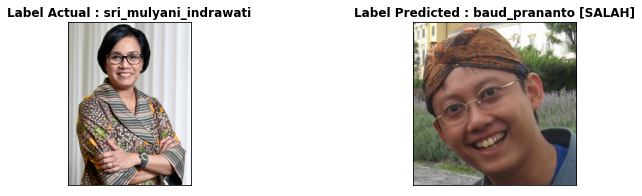

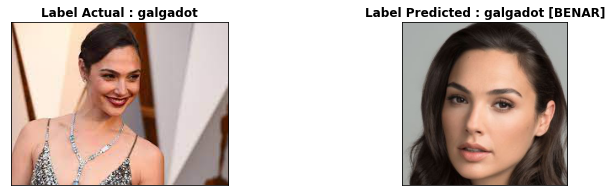

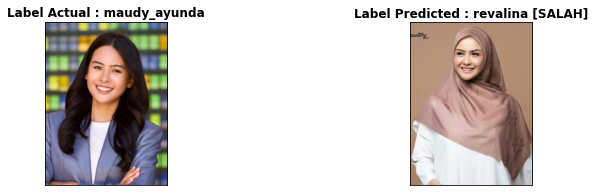

In [ ]:
import matplotlib.image as mpimg

for i, r in tqdm(df_data_test_predict.iterrows(), total=df_data_test.shape[0]):
  plt.figure(figsize=(12,3))
  label = "Label Actual : "+r['label_foto_aktual']
  plt.subplot(1,2,1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title(label, fontweight ='bold', fontsize = 12)

  print(r['img_path_aktual'])
  img = mpimg.imread(r['img_path_aktual'])
  imgplot = plt.imshow(img)

  if r['label_foto_aktual'] == r['label_foto_predict']:
    status = "[BENAR]"
    label_ = "Label Predicted : "+r['label_foto_predict']+" "+status
    plt.subplot(1,2,2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(label_, fontweight ='bold', fontsize = 12)

    img = mpimg.imread(r['img_path_predict'])
    imgplot = plt.imshow(img)
  else:
    status = "[SALAH]"
    label_ = "Label Predicted : "+r['label_foto_predict']+" "+status
    plt.subplot(1,2,2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(label_, fontweight ='bold', fontsize = 12)

    if r['img_path_predict'] == None:
      npArray = np.array([[[0, 0, 0, 0]]], dtype='uint8')
      plt.imshow(npArray, interpolation='nearest')
    else:
      img = mpimg.imread(r['img_path_predict'])
      imgplot = plt.imshow(img)
